# Experiment 2 - Absolute Performance

Generates good lookin graphs from metrics output files

In [1]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run '/home/mark/Desktop/Project/Metrics-Analysis/Utilities.ipynb'

Program parameters:

In [2]:
folder_path            = '../../Testing/Plastic-Parallel-Programming/build/runs/Experiment 2/run1'
parallel_folder_path   = '../../Testing/Plastic-Parallel-Programming/build/runs/Experiment 2/parallelRun1'
sequential_folder_path = '../../Testing/Plastic-Parallel-Programming/build/runs/Experiment 2/sequentialRun1'
rootword               = 'Experiment'
numOfExperiments       = 12
numOfRepeats           = 50

Set files to read

In [3]:
file_names = []

for i in range(numOfExperiments):
    repeat_file_names = []
    
    for j in range(numOfRepeats):
        repeat_file_names.append(rootword + str(i + 1) + "_Repeat" + str(j) + ".csv")
        
    file_names.append(repeat_file_names)
        
sequential_file_names = []

repeats = []

for j in range(numOfRepeats):
    repeats.append(rootword + str(1) + "_Repeat" + str(j) + ".csv")
    
sequential_file_names.append(repeats)

Import the dataset

In [4]:
data = []
parallel_data = []
sequential_data = []
        
fetch_data(folder_path, file_names, data)
fetch_data(parallel_folder_path, file_names, parallel_data)
fetch_data(sequential_folder_path, sequential_file_names, sequential_data)
        
data = extract_runtimes(data)
parallel_data = extract_runtimes(parallel_data)
sequential_data = extract_runtimes(sequential_data)

gen_data = generate_data(data, [1, 2, 3, 4], 'map_array')
gen_parallel_data = generate_data(parallel_data, [1, 2, 3, 4], 'OpenMP')
gen_sequential_data = generate_data(sequential_data, [1], 'Sequential')

dataset = pd.DataFrame(gen_data + gen_parallel_data + gen_sequential_data, 
                       columns=['Number of Cores', 'Implementation', 'Runtime (Milliseconds)'])



Create the graph

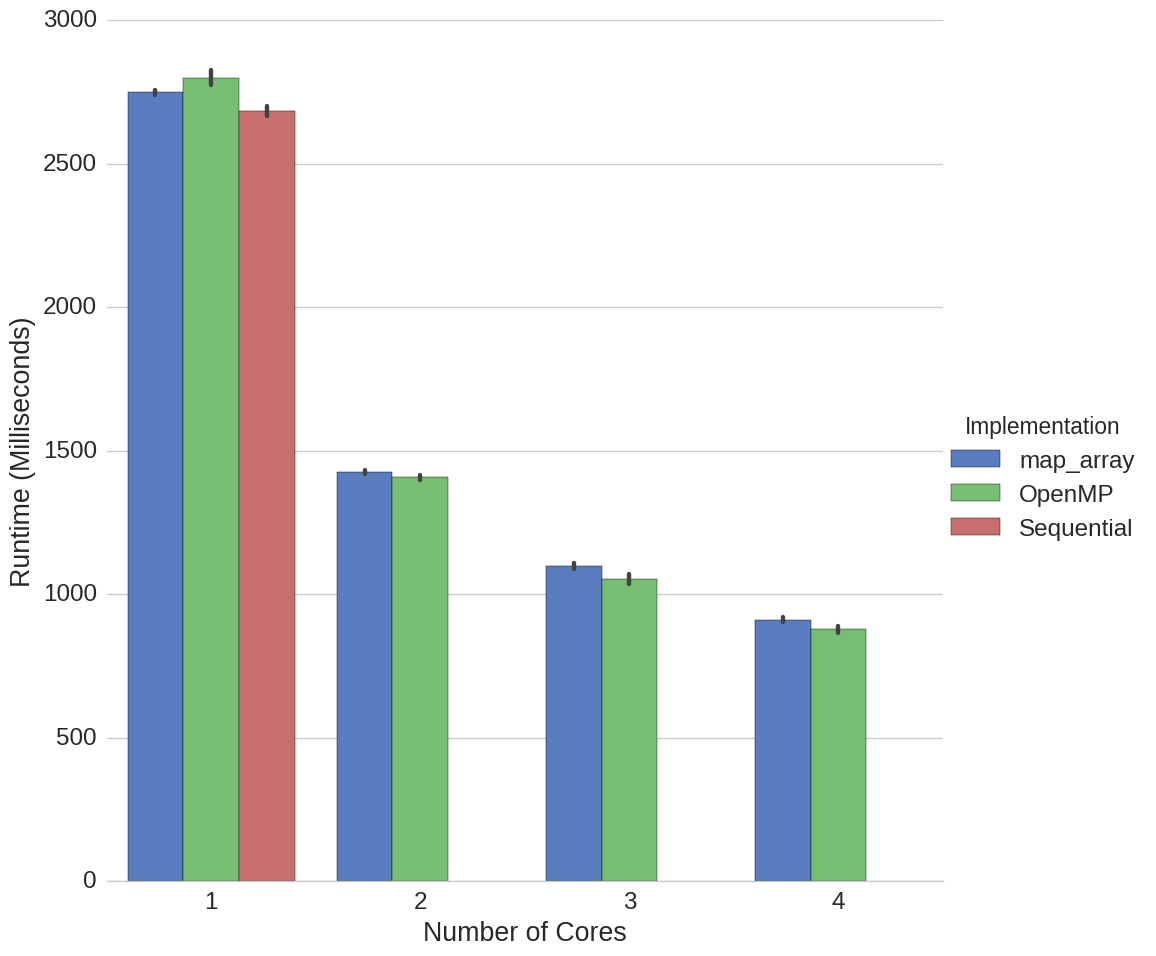

In [5]:
sns.set(style="whitegrid", font_scale=1.75)

graph = sns.factorplot(x="Number of Cores", y = "Runtime (Milliseconds)", hue="Implementation", data=dataset, 
                   size=10, kind="bar", palette="muted")

graph.despine(left=True)
graph.savefig("Graphs/experiment2.png")

sns.plt.show()